# Generating Informative Appointment vs Time Graphs

The purpose of this section is generate some interesting time / appointment grapsh, and offer some insight on the results found. In this first section of code, we import necessary packages, and import our data. We then create our first timegrpah.

      PatientId  AppointmentID Gender        ScheduledDay AppointmentDay  Age  \
0  2.987250e+13        5642903      F 2016-04-29 18:38:08     2016-04-29   62   
1  5.589978e+14        5642503      M 2016-04-29 16:08:27     2016-04-29   56   
2  4.262962e+12        5642549      F 2016-04-29 16:19:04     2016-04-29   62   
3  8.679512e+11        5642828      F 2016-04-29 17:29:31     2016-04-29    8   
4  8.841186e+12        5642494      F 2016-04-29 16:07:23     2016-04-29   56   
5  9.598513e+13        5626772      F 2016-04-27 08:36:51     2016-04-29   76   
6  7.336882e+14        5630279      F 2016-04-27 15:05:12     2016-04-29   23   
7  3.449833e+12        5630575      F 2016-04-27 15:39:58     2016-04-29   39   
8  5.639473e+13        5638447      F 2016-04-29 08:02:16     2016-04-29   21   
9  7.812456e+13        5629123      F 2016-04-27 12:48:25     2016-04-29   19   

       Neighbourhood  Scholarship  Hypertension  Diabetes  Alcoholism  \
0    JARDIM DA PENHA            0  

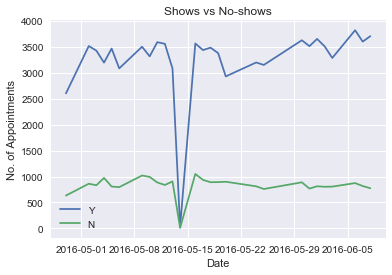

In [14]:
import numpy as np
import pandas as pd
import seaborn as sb
import datetime as dt
import matplotlib.pyplot as plt



%matplotlib inline

#Reading in our data and checking the first 10 rows
medical_data=pd.read_csv('KaggleV2-May-2016.csv',header=0,parse_dates=['ScheduledDay','AppointmentDay'],na_values='',names=['PatientId','AppointmentID','Gender','ScheduledDay','AppointmentDay','Age','Neighbourhood','Scholarship','Hypertension','Diabetes','Alcoholism','Disabled','SMS Received','No-show' ])
print(medical_data.head(10))

# Creating a crosstab that highlights when patients did and did not turn up
my_tab = pd.crosstab(index=medical_data["AppointmentDay"],  # Make a crosstab
                              columns=medical_data["No-show"])      # Name the count column
#print(my_tab.head(5))

#Plotting the previous crosstab. We add xlabels and ylabels as well as a legend and title
plt.plot(my_tab)
plt.xlabel('Date')
plt.ylabel('No. of Appointments')
plt.legend('YN')
plt.title('Shows vs No-shows')
plt.savefig('No. of app over time.png')
plt.show()



As we can see in the above diagram, there is a fairly consistent pattern in booking numbers over the course of our period. There is a sharp drop, and upon investigation, was discovered to be a Saturday. These bookings were probably taken by mistake, with people not realising they were Saturday's at the time of booking.

In the next block of code we will generate a graph that shows when during the day the most number of bookings was made.

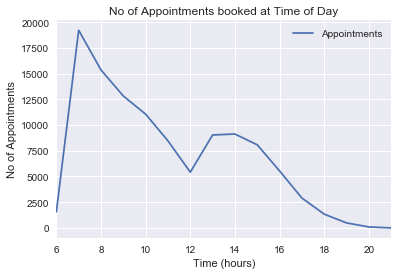

In [15]:
# Creating a graph that shows us the number of appointments booked each hour
# Creating a variable to store the date time
schedule_value=medical_data.loc[:,'ScheduledDay'].values
schedule_df=pd.DataFrame(schedule_value)
schedule_df.columns=['Date']
schedule_df['Appointments']=1

# Creating graph that sums the number of rows in each hour block of the day and returns the result
schedule_df=pd.DataFrame(schedule_df,columns=['Date','Appointments']).set_index('Date')


ax=schedule_df.groupby(schedule_df.index.hour).sum().plot()
ax.set_xlabel('Time (hours)')
ax.set_ylabel('No of Appointments')
ax.set_title('No of Appointments booked at Time of Day')
plt.savefig("Appointments vs Time.png")

As we can see in the above graph, we have a large number of appointments made around 8am in the morning. This makes sense as if people were to wake up sick, the first thing they would go see the doctor in order to get medicine. We see another spike in the early afternoon, and to us, this indicates the people who either deteriated during the course of the day or if they had children, were informed by the school that their child has been sick. This leads them to book in the afternoon.

Above we examined all appointments. Next we examine what the most popular time was for booking an appointment and then the patient didn't show up is, and we expect to see a large rise again in the morning.

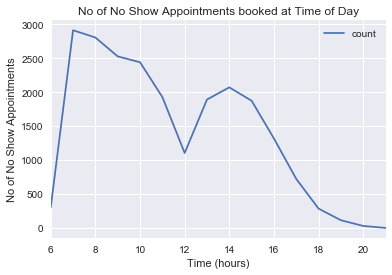

In [20]:
noShow=medical_data['No-show']=='Yes'

schedule_value=medical_data.loc[:,'ScheduledDay'][noShow].values
schedule_df=pd.DataFrame(schedule_value)
schedule_df.columns=['Date']
schedule_df['count']=1

schedule_df=pd.DataFrame(schedule_df,columns=['Date','count']).set_index('Date')


ax=schedule_df.groupby(schedule_df.index.hour).sum().plot()
ax.set_xlabel('Time (hours)')
ax.set_ylabel('No of No Show Appointments')
ax.set_title('No of No Show Appointments booked at Time of Day')
plt.savefig("No-Show Appointments vs Time.png")

It is easy enough to see what happened here. People wake up ill, book a medical appointment, and then begin to feel better as the day progesses and opt to not go to the doctor but do not call to cancel.